# HW 9 - Radioactive Decay (Thallium), vPython Brownian Motion

In [1]:
import numpy as np
from numba import jit
import random
import matplotlib.pyplot as plt

def prob_func(delta_t):
    
    decay_rate = 3.053*60          # in secs by *60
        
    x = np.linspace(0,delta_t)
        
    y = 1-2**(-1*x/decay_rate)
    
    plt.plot(x,y)
    plt.show
        
    return

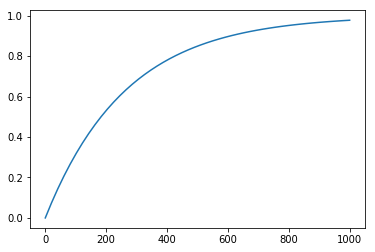

In [3]:
prob_func(1000)

In [17]:
def generate_X_values_exponentially_distributed(Npoints):
    
    hlf = 3.053*60 # seconds
    mu = np.log(2)/hlf
    X = []

    for i in range(Npoints):

        z = random.random()
        x_result = int((-1 / mu) * np.log(1 - z))
        X.append(x_result)

    
    plt.hist(X, bins=100)
    plt.xlim(0, 1000)
    plt.show()
    
    return
        

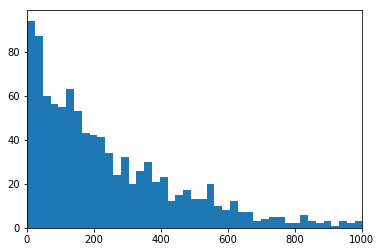

In [18]:
generate_X_values_exponentially_distributed(1000)

In [6]:
def decay_func(tsec):
        
# using the given function for radioactive decay, as a function of t

    hlf = 3.053*60 # seconds
    atom_init = 1000
    mu = np.log(2)/hlf
    
    t = np.linspace(0,tsec)
    f = lambda t: atom_init * 2**(-1*t/hlf)
    y = f(t)
    
    plt.plot(t,y)
    plt.show()
    
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#

# using non-uniform distribution

    DECAY = atom_init * np.ones([tsec-1])
    PROB = np.zeros([tsec-1])
    Nrandompoints = 1000
    
    for i in range(Nrandompoints):
        z = random.random()
        x_result = int((-1 / mu) * np.log(1 - z))
        
        if x_result < tsec :
            DECAY[x_result:] -= 1
            PROB[x_result:] += 1
        
    plt.plot(DECAY, label='Decay of Thallium')
    plt.plot(PROB, label='Probability')
    plt.legend()
    plt.show()
    
    return

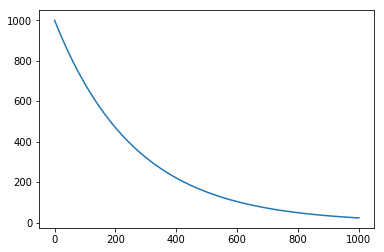

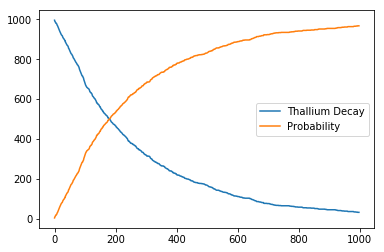

In [7]:
decay_func(1000)

ERROR! Session/line number was not unique in database. History logging moved to new session 177


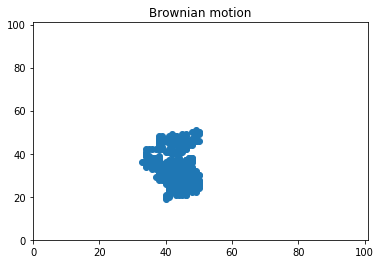

In [41]:
# BROWNIAN MOTION

# init
L1 = 101
L2 = 101
N = 1000

position = np.empty([N,2])
position[0,0] = int(L1/2)
position[0,1] = int(L2/2)
direction = [[0,1],[0,-1],[1,0],[-1,0]]

# random walk
for i in range(1,N):
    position1 = [-1,-1]
    
    while min(position1)<0 or position1[0] >L1 or position1[1] >L2:
        move = np.random.randint(len(direction))
        position1 = position[i-1,:] + direction[move]
        
    position[i,:] = position1
plt.xlim(0,101)
plt.ylim(0,101)
plt.title('Brownian motion')
plt.plot(position[:,0], position[:,1], '-o')        
plt.show()

In [2]:
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ball = sphere(pos = vector(0,0,0), radius=0.5, color=color.white, make_trail=True)
r = vector(1,1,0)
direction = np.array([[1],[-1]])

for i in range(150):
    rate(10)
    ball.pos = r
    x_move = np.random.randint(len(direction))
    y_move = np.random.randint(len(direction))
    r.x = r.x + direction[x_move] * random() 
    r.y = r.y + direction[y_move] * random()